ML Model - Petros Pasatas. Health Insurance Cross-Sale Prediction algorithm

In [ ]:
#Import Libraries

In [3]:
#Data Pre-processing variables
import pandas as pd
import numpy as np

#Data Vizualisation & Plotting
import matplotlib
import matplotlib.pyplot as plt

#Data predictive analysis sklearn & scaler.
import sklearn
from sklearn.preprocessing import StandardScaler

#Sklearn categorical encoding variable & pipeline crossing validation
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline


#Data transformers & metrics.
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

#Statistical vizualisation 
import seaborn as sns

# Line plot
%matplotlib inline

# Python warnings suppression
import warnings
warnings.filterwarnings('ignore')


In [4]:
# Loading datasets

In [5]:
health_train = pd.read_csv("train.csv")
health_test = pd.read_csv("test.csv")

In [6]:
# checking for the shape(size) of the train set
health_train.shape

(381109, 12)

In [7]:
# checking for the shape(size) of the test set
health_test.shape

(127037, 11)

In [8]:
# checking for null or empty column in train.csv
health_train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [9]:
# checking for null or empty cell or column in test.csv
health_test.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

In [10]:
# Validation of null values and data type in train.csv
health_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  int64  
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  int64  
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 34.9+ MB


In [11]:
# Validation of null values and data type in test.csv
health_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    127037 non-null  int64  
 1   Gender                127037 non-null  object 
 2   Age                   127037 non-null  int64  
 3   Driving_License       127037 non-null  int64  
 4   Region_Code           127037 non-null  int64  
 5   Previously_Insured    127037 non-null  int64  
 6   Vehicle_Age           127037 non-null  object 
 7   Vehicle_Damage        127037 non-null  object 
 8   Annual_Premium        127037 non-null  float64
 9   Policy_Sales_Channel  127037 non-null  int64  
 10  Vintage               127037 non-null  int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 10.7+ MB


In [12]:
# Getting the first 20 rows in the train set
health_train.head(20)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,404.54,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,335.36,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,382.94,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,286.19,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,274.96,152,39,0
5,6,Female,24,1,33,0,< 1 Year,Yes,26.30,160,176,0
6,7,Male,23,1,11,0,< 1 Year,Yes,233.67,152,249,0
7,8,Female,56,1,28,0,1-2 Year,Yes,320.31,26,72,1
8,9,Female,24,1,3,1,< 1 Year,No,276.19,152,28,0
9,10,Female,32,1,6,1,< 1 Year,No,287.71,152,80,0


In [13]:
# Getting the first 20 rows in the test set

health_test.head(20)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11,1,< 1 Year,No,357.86,152,53
1,381111,Male,40,1,28,0,1-2 Year,Yes,337.62,7,111
2,381112,Male,47,1,28,0,1-2 Year,Yes,400.50,124,199
3,381113,Male,24,1,27,1,< 1 Year,Yes,373.56,152,187
4,381114,Male,27,1,28,1,< 1 Year,No,590.97,152,297
5,381115,Male,22,1,30,1,< 1 Year,No,402.07,152,266
6,381116,Female,51,1,37,1,1-2 Year,No,401.18,26,107
7,381117,Male,25,1,41,1,< 1 Year,No,233.75,152,232
8,381118,Male,42,1,41,0,1-2 Year,Yes,26.30,26,277
9,381119,Female,37,1,12,1,1-2 Year,No,271.24,124,133


In [14]:
# Train dataset statistical summary
health_train.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,305.643896,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,172.131551,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,26.300000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,244.050000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,316.690000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,394.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,5401.650000,163.000000,299.000000,1.000000


In [15]:
# Test dataset statistical summary
health_test.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage
count,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000,127037.000000
mean,444628.000000,38.765903,0.998134,26.459866,0.460039,305.246436,111.800468,154.318301
std,36672.567411,15.465814,0.043152,13.209916,0.498403,169.452971,54.371765,83.661588
min,381110.000000,20.000000,0.000000,0.000000,0.000000,26.300000,1.000000,10.000000
25%,412869.000000,25.000000,1.000000,15.000000,0.000000,243.250000,26.000000,82.000000
50%,444628.000000,36.000000,1.000000,28.000000,0.000000,316.420000,135.000000,154.000000
75%,476387.000000,49.000000,1.000000,35.000000,1.000000,394.080000,152.000000,227.000000
max,508146.000000,85.000000,1.000000,52.000000,1.000000,4720.420000,163.000000,299.000000


In [16]:
# Looking at the number of columns and number of unique values in the dataset

for i in health_train.columns:
    print(f'{i} --> {health_train[i].nunique()}')

id --> 381109
Gender --> 2
Age --> 66
Driving_License --> 2
Region_Code --> 53
Previously_Insured --> 2
Vehicle_Age --> 3
Vehicle_Damage --> 2
Annual_Premium --> 48838
Policy_Sales_Channel --> 155
Vintage --> 290
Response --> 2


In [17]:
# Object correlation analysis visualised plot 

Male      206089
Female    175020
Name: Gender, dtype: int64


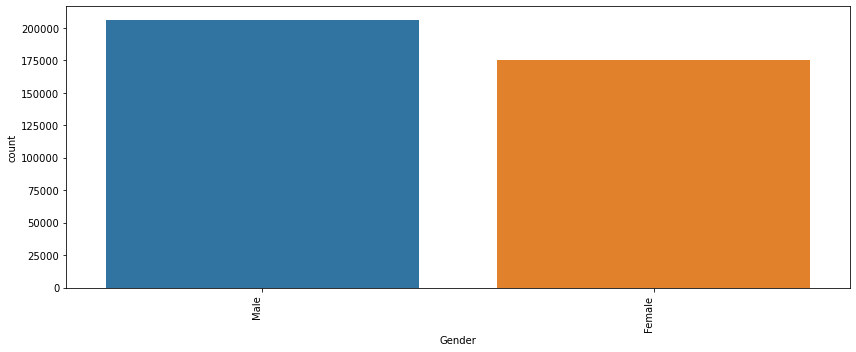

1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: Vehicle_Age, dtype: int64


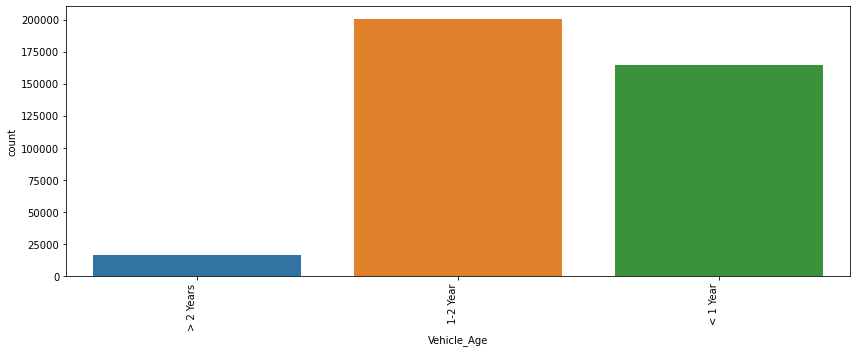

Yes    192413
No     188696
Name: Vehicle_Damage, dtype: int64


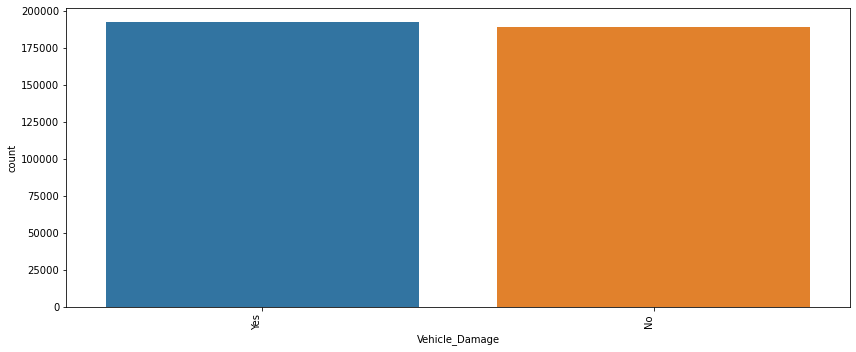

In [18]:
def object_count_plot(health_train):
    """
    Description : Plot countplot for all categorical features present in the dataframe passed
    Argument : Dataframe
    """
    
    for var in health_train.columns:
        if health_train[var].dtype == 'object':
            print(health_train[var].value_counts())
            plt.figure(figsize=(12,5))
            g = sns.countplot(x=var,data=health_train)
            g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
            plt.tight_layout()
            plt.savefig('figure.png')
            plt.show()
object_count_plot(health_train)

In [19]:
# Numerical correlation analysis visualised plot 

count    381109.000000
mean     190555.000000
std      110016.836208
min           1.000000
25%       95278.000000
50%      190555.000000
75%      285832.000000
max      381109.000000
Name: id, dtype: float64


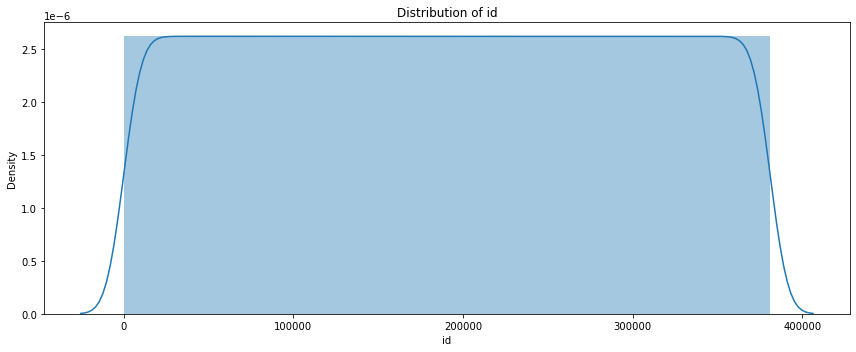

count    381109.000000
mean         38.822584
std          15.511611
min          20.000000
25%          25.000000
50%          36.000000
75%          49.000000
max          85.000000
Name: Age, dtype: float64


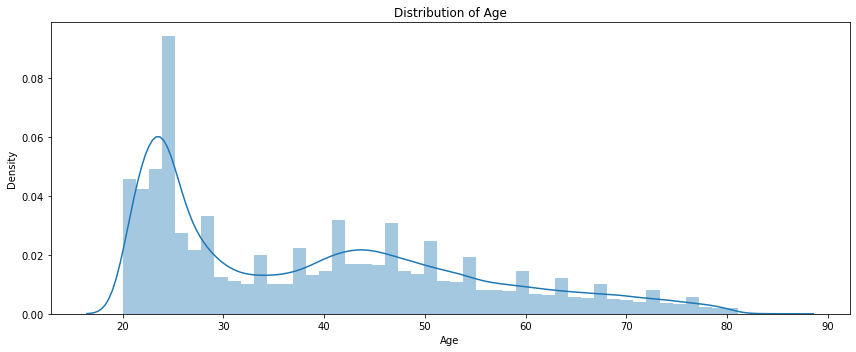

count    381109.000000
mean          0.997869
std           0.046110
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: Driving_License, dtype: float64


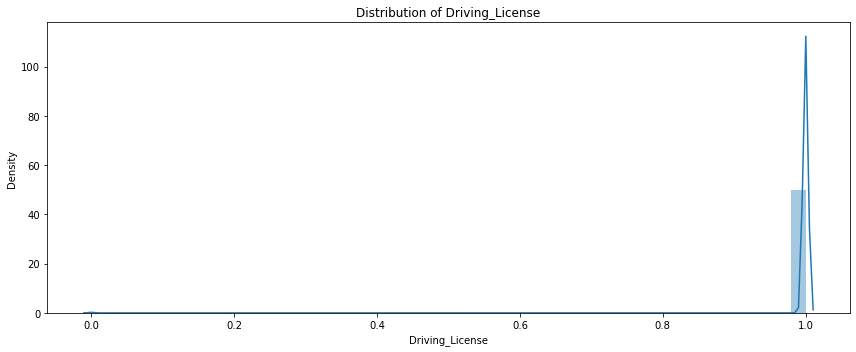

count    381109.000000
mean         26.388807
std          13.229888
min           0.000000
25%          15.000000
50%          28.000000
75%          35.000000
max          52.000000
Name: Region_Code, dtype: float64


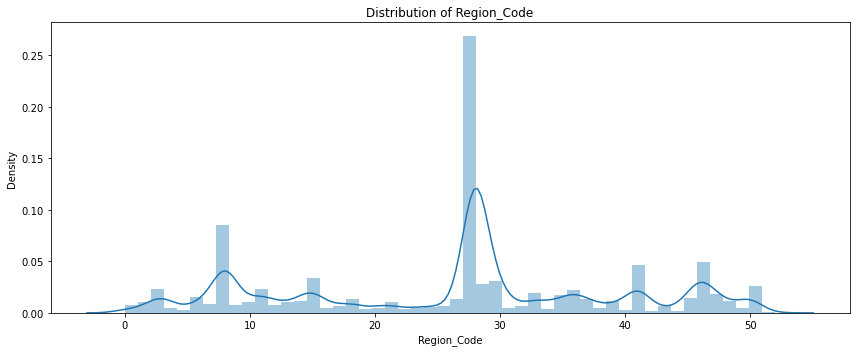

count    381109.000000
mean          0.458210
std           0.498251
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: Previously_Insured, dtype: float64


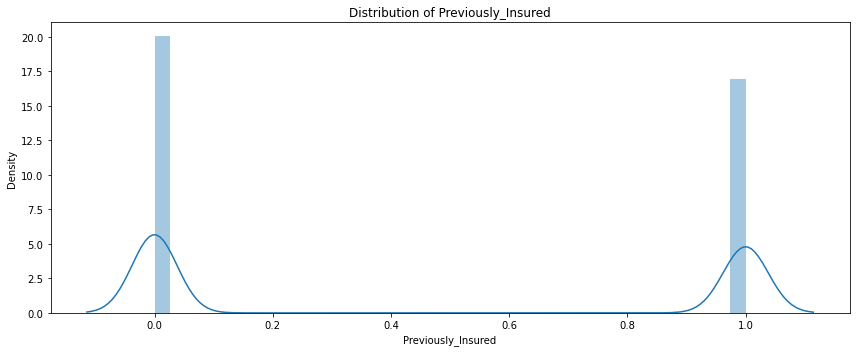

count    381109.000000
mean        305.643896
std         172.131551
min          26.300000
25%         244.050000
50%         316.690000
75%         394.000000
max        5401.650000
Name: Annual_Premium, dtype: float64


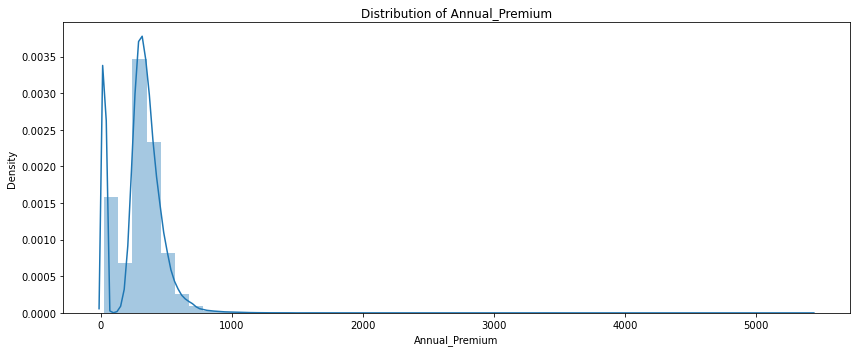

count    381109.000000
mean        112.034295
std          54.203995
min           1.000000
25%          29.000000
50%         133.000000
75%         152.000000
max         163.000000
Name: Policy_Sales_Channel, dtype: float64


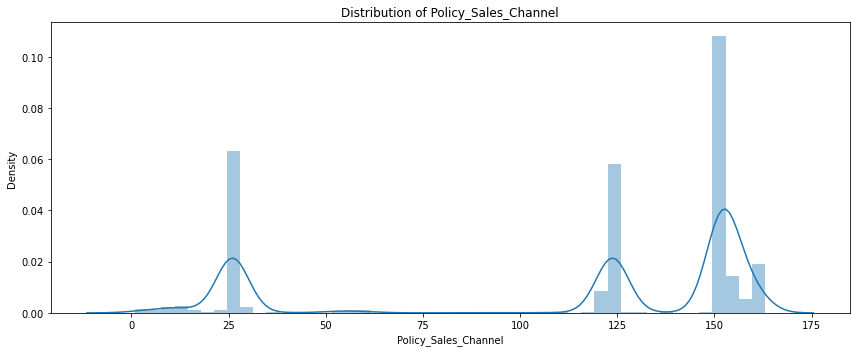

count    381109.000000
mean        154.347397
std          83.671304
min          10.000000
25%          82.000000
50%         154.000000
75%         227.000000
max         299.000000
Name: Vintage, dtype: float64


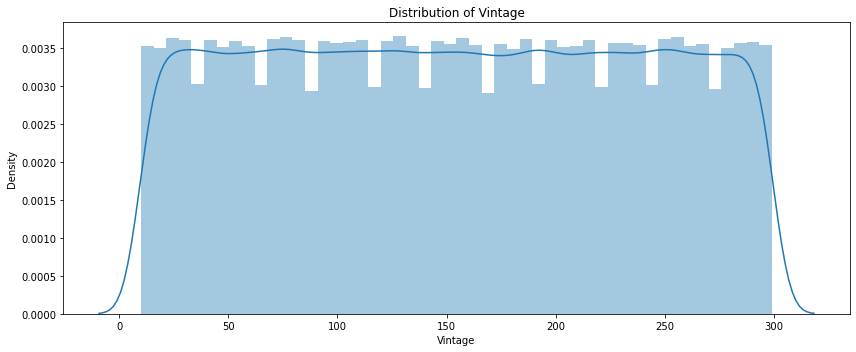

count    381109.000000
mean          0.122563
std           0.327936
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Response, dtype: float64


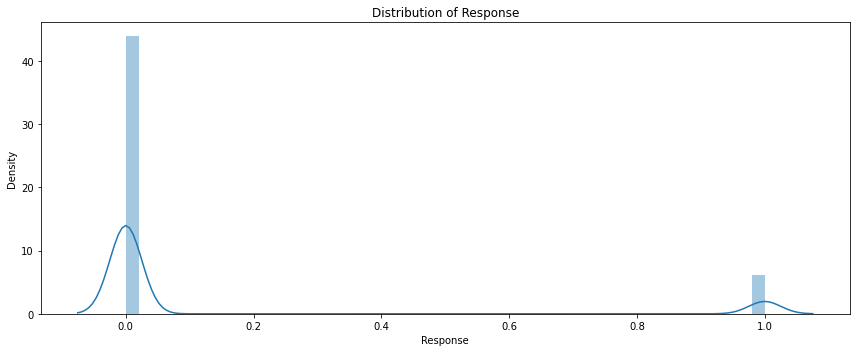

In [20]:
def numeric_distribution_plot(health_train):
    """
    Description : Gives distribution plot for all the numeric features in the dataframe passed
    Argument : Dataframe
    """
    for col in health_train.columns:
        if health_train[col].dtype != 'object':
            print(health_train[col].describe())
            plt.figure(figsize=(12,5))
            plt.title("Distribution of "+col)
            ax = sns.distplot(health_train[col].dropna())
            plt.tight_layout()
            plt.show()
numeric_distribution_plot(health_train)

<AxesSubplot:xlabel='Gender', ylabel='count'>

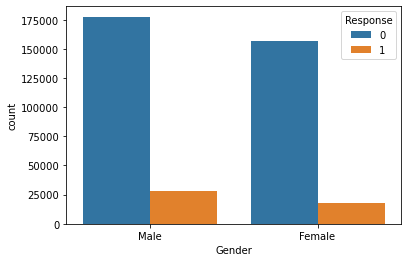

In [21]:
# Checking the relationship between target 'Response' and Gender variable

sns.countplot(data=health_train,x='Gender',hue='Response')

So we have more response from male, than females.

<AxesSubplot:xlabel='Gender', ylabel='count'>

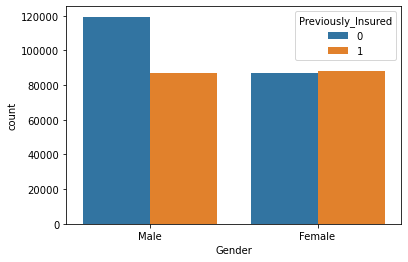

In [22]:
# Checking relationship between Previously Insured and Gender

sns.countplot(data=health_train,x='Gender',hue='Previously_Insured')

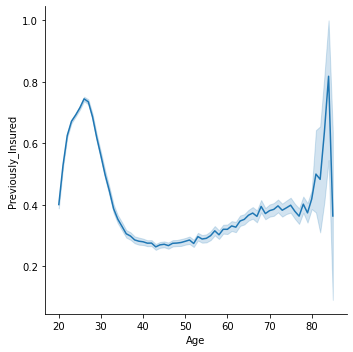

In [23]:
# Looking out for the Ages of people that have previously insured.

sns.relplot(data=health_train,x='Age',y='Previously_Insured', kind='line')

<AxesSubplot:xlabel='Response', ylabel='count'>

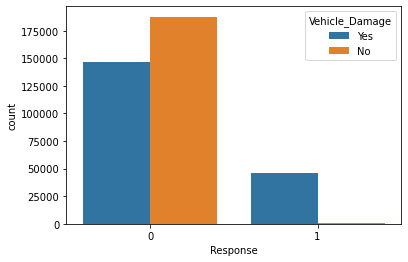

In [24]:
# Looking at the relationship between Response and Vehicle_Damage

sns.countplot(data=health_train,x='Response',hue='Vehicle_Damage')

<AxesSubplot:xlabel='Response', ylabel='count'>

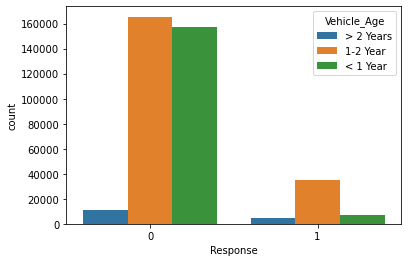

In [25]:
# Looking at the plot of Response to Vehicle_Age also.

sns.countplot(data=health_train,x='Response',hue='Vehicle_Age')

In [26]:
# Outliers

Matplotlib is building the font cache; this may take a moment.


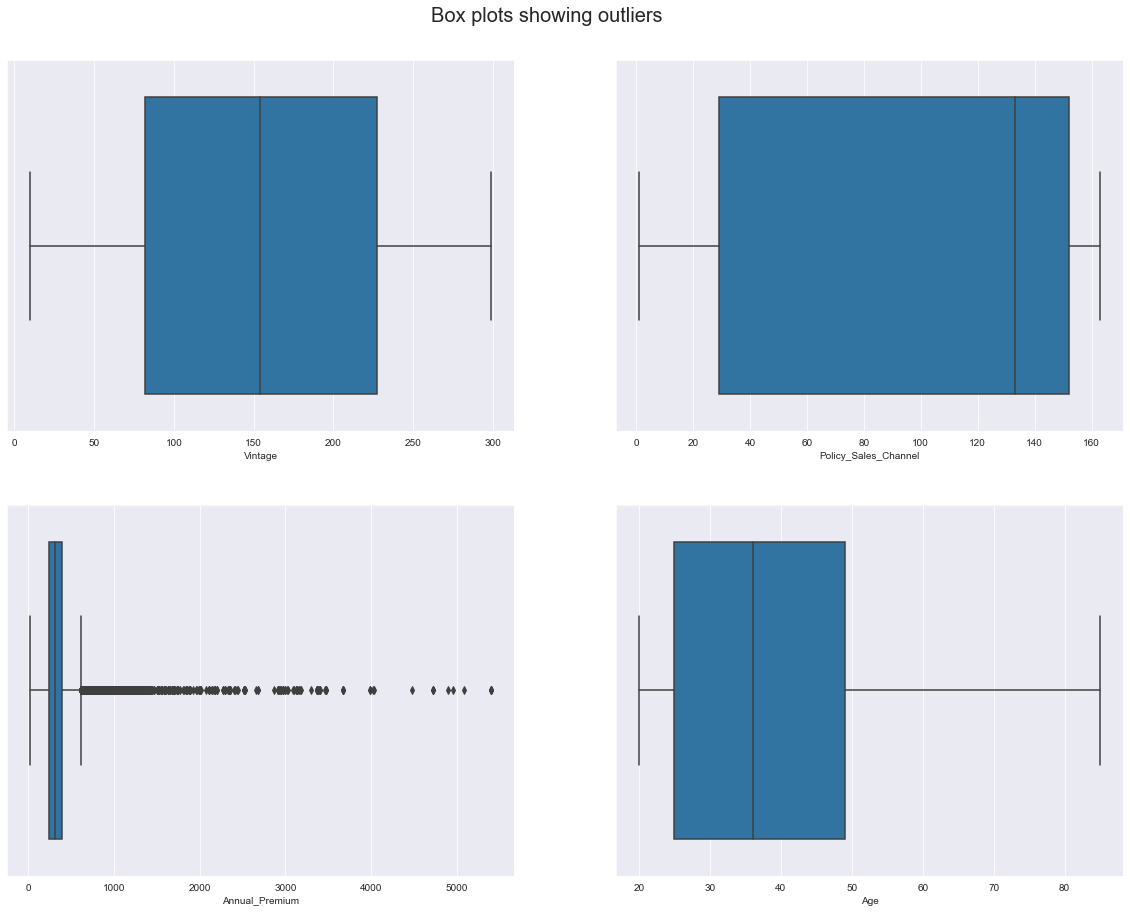

In [27]:
# Features boxplots for each of the numerical columns
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 15))
fig.suptitle('Box plots showing outliers', y= 0.93, fontsize = 20)

for ax, data, name in zip(axes.flatten(), health_train, ["Vintage", "Policy_Sales_Channel", "Annual_Premium", "Age"]):
  sns.boxplot(health_train[name], ax = ax)

<AxesSubplot:>

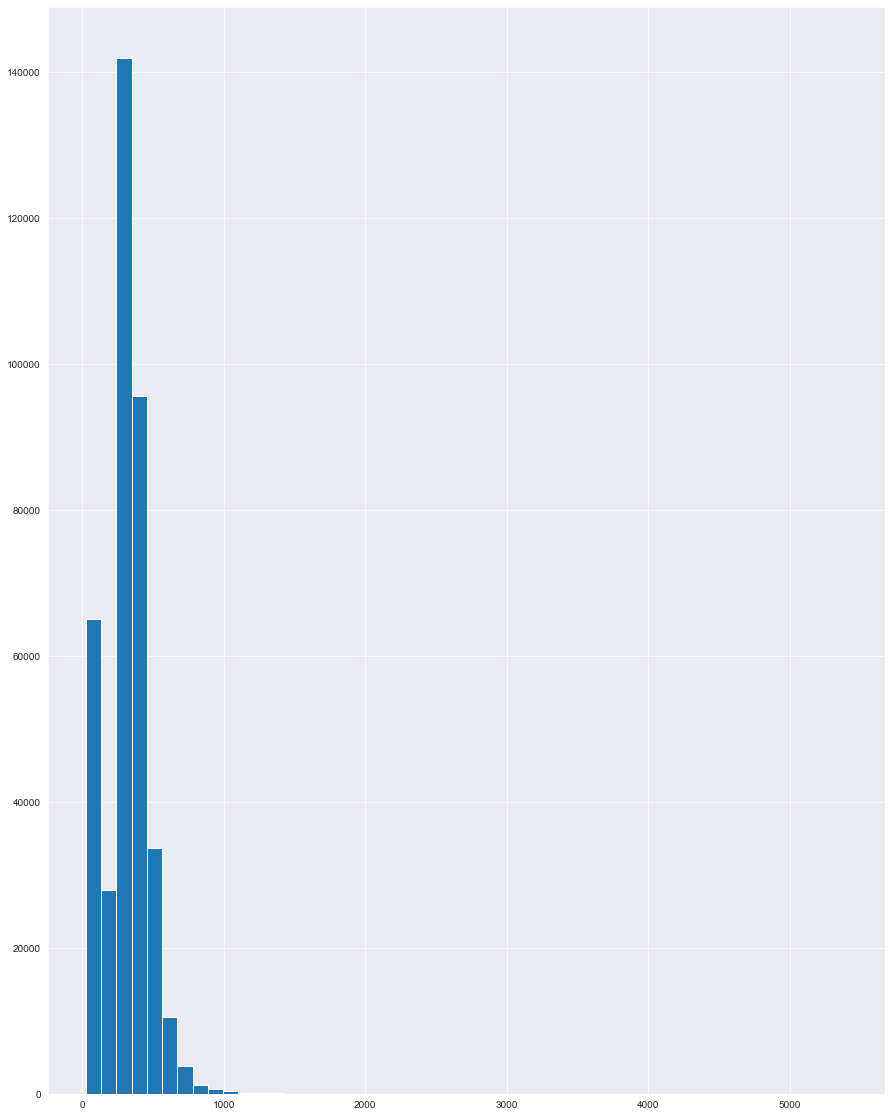

In [28]:
# Annual Premium  
health_train['Annual_Premium'].hist(figsize=(15, 20), bins=50)

In [29]:
# Checking it's description again.
health_train['Annual_Premium'].describe()

count    381109.000000
mean        305.643896
std         172.131551
min          26.300000
25%         244.050000
50%         316.690000
75%         394.000000
max        5401.650000
Name: Annual_Premium, dtype: float64

In [30]:
# Selecting the quantile in the range of 4% to 96%. 

min_threshold_1, max_threshold_1 = health_train['Annual_Premium'].quantile([0.04, 0.96])
min_threshold_1, max_threshold_1

(26.3, 575.6467999999999)

In [31]:
# Quantile range for annual premium in train.

health_train_1 = health_train[(health_train.Annual_Premium >min_threshold_1) & (health_train.Annual_Premium  < max_threshold_1)]

In [32]:
# looking at the shape of the remaining dataset.

health_train_1.shape

(300987, 12)

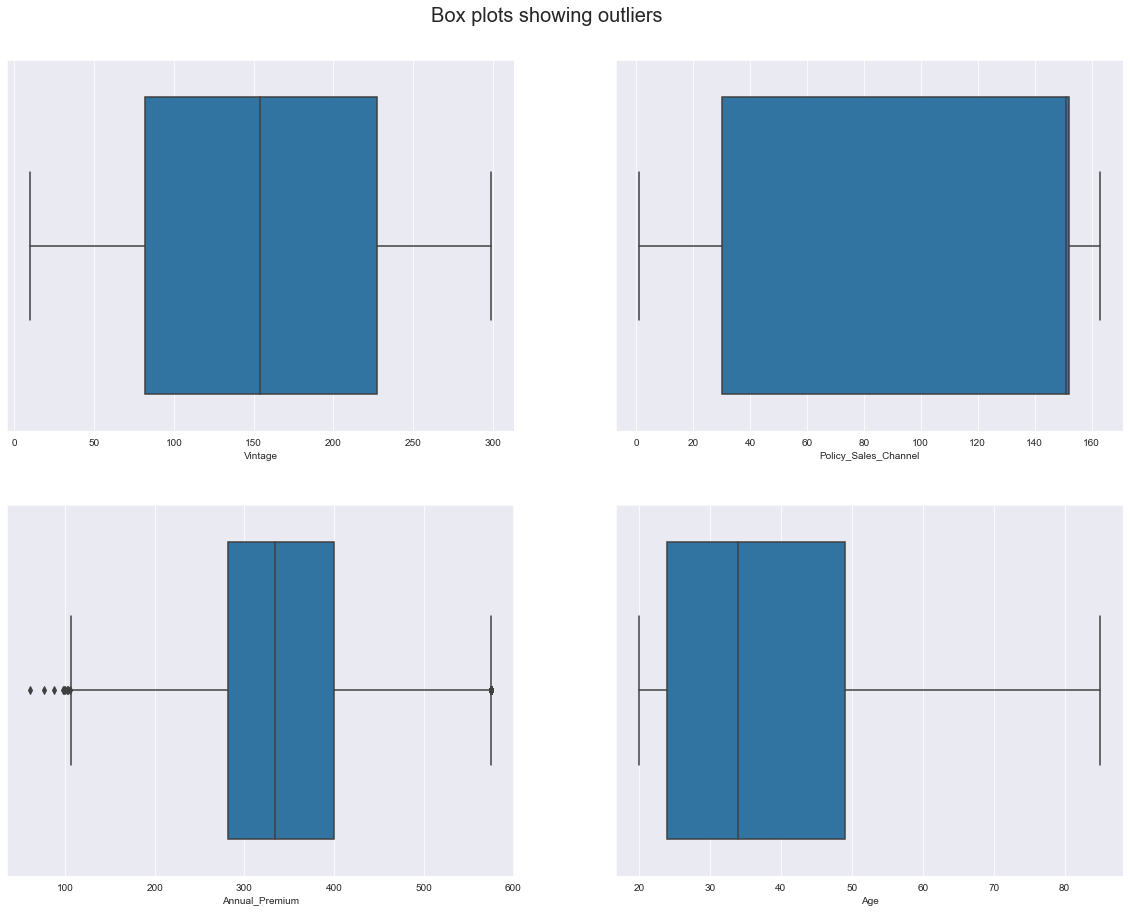

In [33]:
# Plotting boxplots for each of the numerical columns
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 15))
fig.suptitle('Box plots showing outliers', y= 0.93, fontsize = 20)

for ax, data, name in zip(axes.flatten(), health_train_1, ["Vintage", "Policy_Sales_Channel", "Annual_Premium", "Age"]):
  sns.boxplot(health_train_1[name], ax = ax)

This looks good.

Checking the plot for Annual_premium again.

<AxesSubplot:>

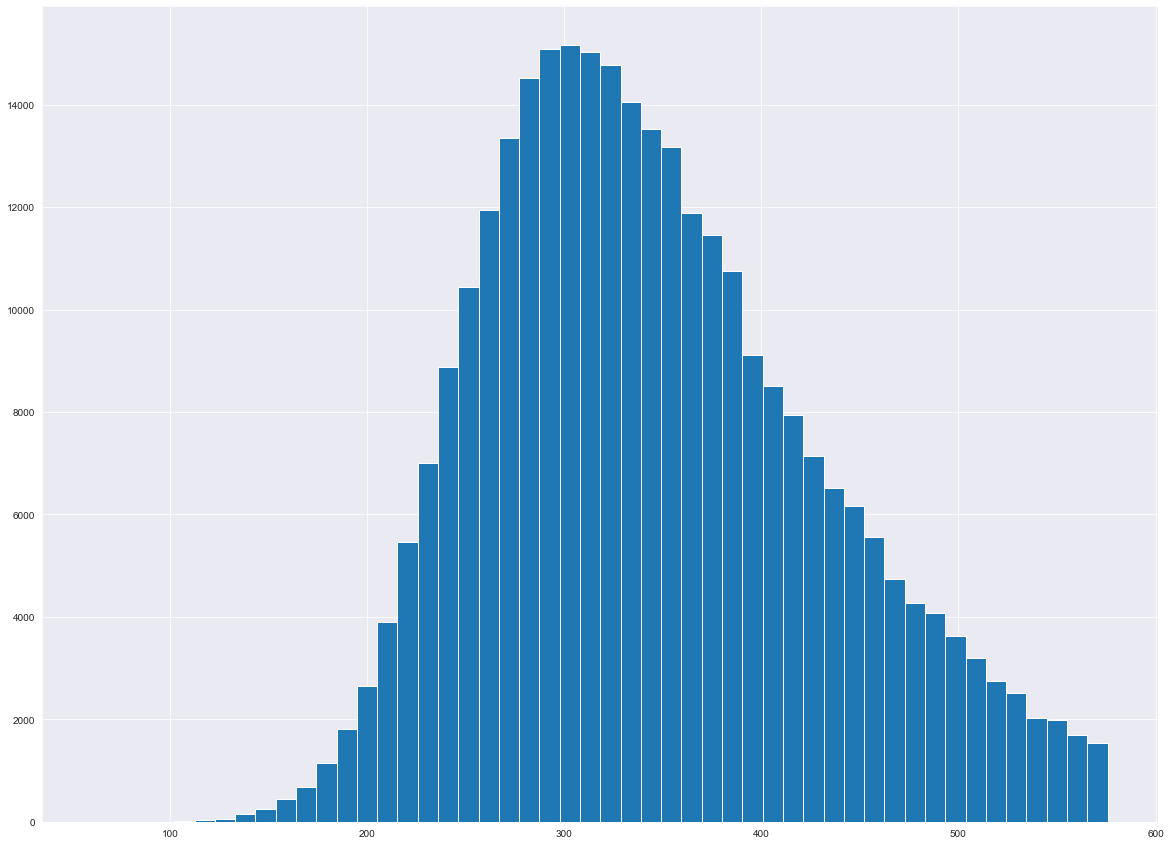

In [34]:
# Hec

health_train_1['Annual_Premium'].hist(figsize=(20, 15), bins=50)

Now we can work with this, it is no longer skewed.

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Driving_License'}>],
       [<AxesSubplot:title={'center':'Region_Code'}>,
        <AxesSubplot:title={'center':'Previously_Insured'}>,
        <AxesSubplot:title={'center':'Annual_Premium'}>],
       [<AxesSubplot:title={'center':'Policy_Sales_Channel'}>,
        <AxesSubplot:title={'center':'Vintage'}>,
        <AxesSubplot:title={'center':'Response'}>]], dtype=object)

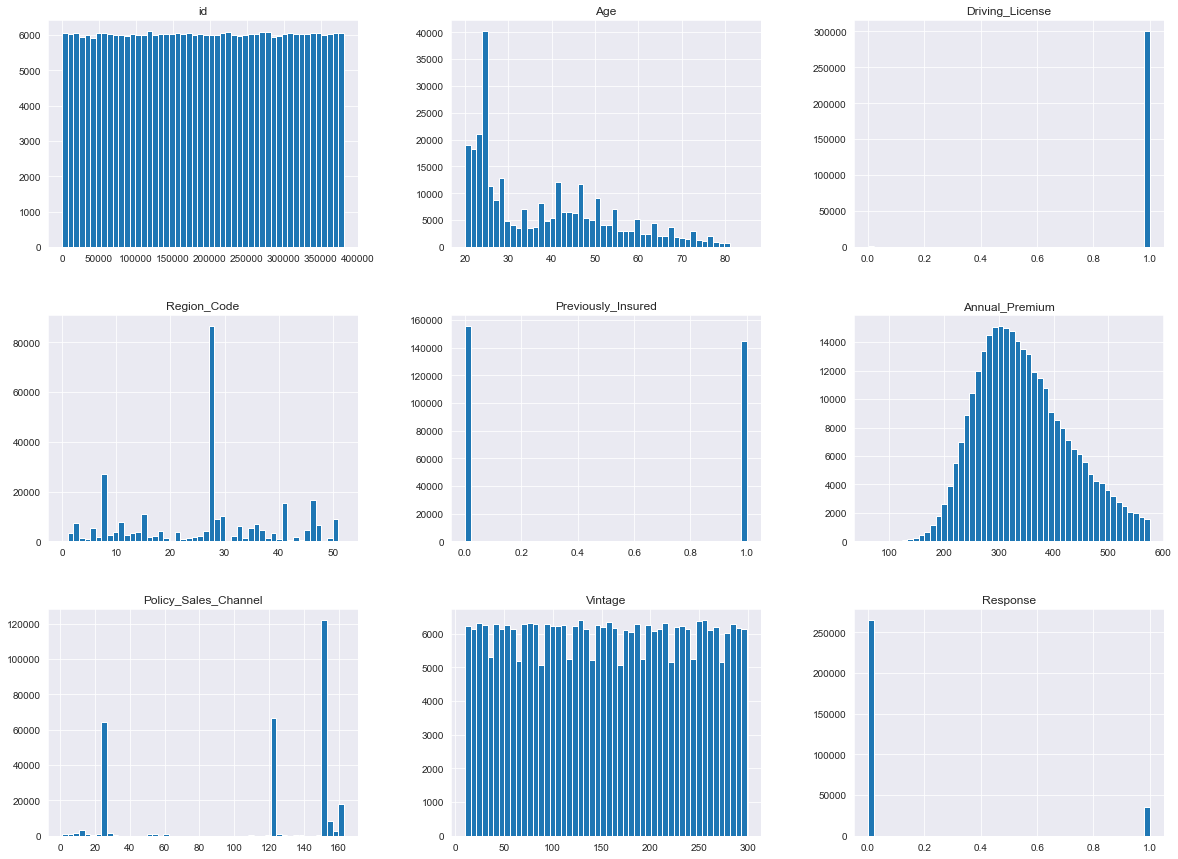

In [35]:
# Plotting the whole dataset to have an overview of how they look.

health_train_1.hist(figsize=(20, 15), bins=50)

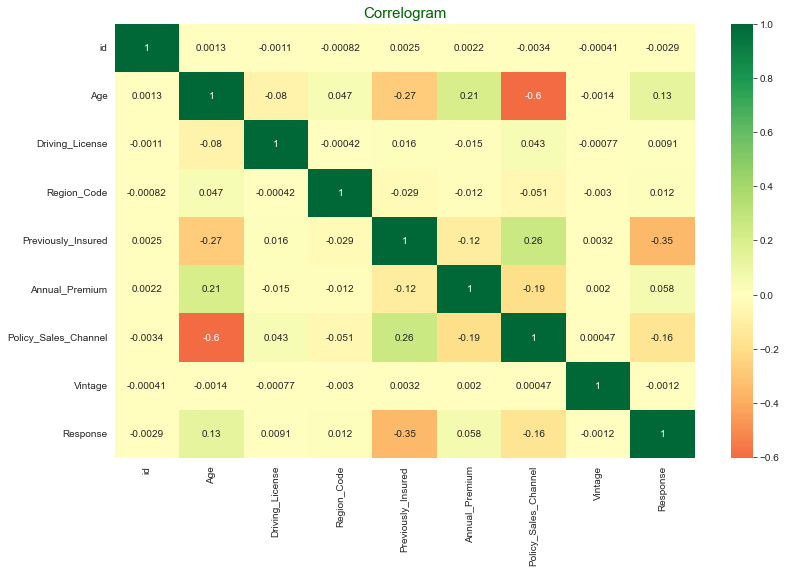

In [36]:
# Lookig at the correlation of each columns 

# Quantify correlations
corr = health_train_1.corr()
plt.figure(figsize = (13, 8))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()

In [37]:
# Looking at their correlation again.

health_corr=health_train_1.corr()
health_corr['Response'].sort_values(ascending=False)

Response                1.000000
Age                     0.125045
Annual_Premium          0.058259
Region_Code             0.011812
Driving_License         0.009136
Vintage                -0.001234
id                     -0.002889
Policy_Sales_Channel   -0.161982
Previously_Insured     -0.352340
Name: Response, dtype: float64

In [38]:
# Removing Preeviously_Insured and Policy_Sales_channel

health_train_1 = health_train_1.drop(['Previously_Insured', 'Policy_Sales_Channel'], axis=1)

In [39]:
# Removing them from the test set also

health_test = health_test.drop(['Previously_Insured', 'Policy_Sales_Channel'], axis=1)

In [40]:
# Setting our target variable which is the response in this case

health_label = health_train_1['Response']
health_train_2 = health_train_1.drop('Response', axis=1)

In [41]:
# Creating a validation dataset, to validate our model.

from sklearn.model_selection import train_test_split
health_train_3, health_validation  = train_test_split(health_train_2, test_size=0.2, random_state=10) 
health_train_label, health_validation_label = train_test_split(health_label, test_size=0.2, random_state=10)

In [42]:
health_train_3.shape

(240789, 9)

In [43]:
health_train_label.shape

(240789,)

In [44]:
health_validation.shape

(60198, 9)

In [45]:
health_validation_label.shape

(60198,)

In [46]:
# Appending columns that are fit for numerical operation and classification operations.
# Appending them to a list.

num_column = []
cat_column = []
for column in health_train_3.columns:
    if health_train_3[column].dtype != "object":
        num_column.append(column)
    else:
        cat_column.append(column)
print(cat_column)
print(num_column)

['Gender', 'Vehicle_Age', 'Vehicle_Damage']
['id', 'Age', 'Driving_License', 'Region_Code', 'Annual_Premium', 'Vintage']


In [47]:
# Creating a dataframe and converting it to a list so they can work in the pipeline effectively.

train_data_num = list(health_train_3[num_column])
train_data_object = list(health_train_3[cat_column])

In [48]:
# Encoding variables and pipeline


num_pipeline = Pipeline([
    ("Standard scaler", StandardScaler())
])

cat_pipeline = Pipeline([
    ("cat_encoder", OneHotEncoder(sparse=False)),
])

In [49]:
# Combining the two pipelines so they can work on a dataset generally.

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, train_data_num),
    ("objects", OneHotEncoder(), train_data_object),
])

In [50]:
# Fitting the train set to the pipeline.

health_train_prepared = full_pipeline.fit_transform(health_train_3)

In [51]:
# Transforming the validation set also.

health_validation_prepared = full_pipeline.transform(health_validation)

In [52]:
# Then transforming the test set.

health_test_prepared = full_pipeline.transform(health_test)

## Modelling

### RandomForestClassifier

In [53]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

forest_clf = RandomForestClassifier(random_state = 10)
forest_clf.fit(health_train_prepared, health_train_label)
health_pred = forest_clf.predict(health_validation_prepared)
print("Accuracy ", accuracy_score(health_validation_label, health_pred))
health_prob = forest_clf.predict_proba(health_validation_prepared)
print("Roc_AUC_Score ", roc_auc_score(health_validation_label, health_prob[:,1]))

Accuracy  0.8749626233429683
Roc_AUC_Score  0.8371699103091403


### DecisionTreeClassifier

In [54]:
from sklearn.tree import DecisionTreeClassifier as dtc

tree_clf = dtc(max_depth=10)
tree_clf.fit(health_train_prepared, health_train_label)
health_pred = tree_clf.predict(health_validation_prepared)
print("Accuracy ", accuracy_score(health_validation_label, health_pred))
health_prob = tree_clf.predict_proba(health_validation_prepared)
print("Roc_AUC_Score ", roc_auc_score(health_validation_label, health_prob[:,1]))

Accuracy  0.8792650918635171
Roc_AUC_Score  0.8450692496513639


### XGBoostClassifier

In [55]:
import xgboost

from xgboost.sklearn import XGBClassifier
xgboost_clf = XGBClassifier(random_state=42, eval_metric='mlogloss')
xgboost_clf.fit(health_train_prepared, health_train_label)
health_pred = xgboost_clf.predict(health_validation_prepared)
print("Accuracy ", accuracy_score(health_validation_label, health_pred))
health_prob = xgboost_clf.predict_proba(health_validation_prepared)
print("Roc_AUC_Score ", roc_auc_score(health_validation_label, health_prob[:,1]))

ModuleNotFoundError: No module named 'xgboost'

### LGBMClassifier

In [ ]:
from lightgbm import LGBMClassifier

lgb_clf = LGBMClassifier()
lgb_clf.fit(health_train_prepared, health_train_label)
health_pred = lgb_clf.predict(health_validation_prepared)
print("Accuracy ", accuracy_score(health_validation_label, health_pred))
health_prob = lgb_clf.predict_proba(health_validation_prepared)
print("Roc_AUC_Score ", roc_auc_score(health_validation_label, health_prob[:,1]))

### GradientBoostingClassifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gbc_clf = GradientBoostingClassifier()
gbc_clf.fit(health_train_prepared, health_train_label)
health_pred = gbc_clf.predict(health_validation_prepared)
print("Accuracy ", accuracy_score(health_validation_label, health_pred))
health_prob = gbc_clf.predict_proba(health_validation_prepared)
print("Roc_AUC_Score ", roc_auc_score(health_validation_label, health_prob[:,1]))

In [ ]:
test_pred = gbc_clf.predict(health_test_prepared)

In [ ]:
test_pred[:100]

In [ ]:
# Now creating a dataframe that have the response prediction and the id. Our Submission.

test_response = pd.DataFrame()
test_response['id'] = health_test.id
test_response['Predicted Response'] = test_pred

In [ ]:
test_response